In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.shape

(10000, 14)

#Univariate analysis

In [ ]:
df.groupby(['Geography']).count()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,,,,,
France,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014
Germany,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509
Spain,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477


Bi variate analysis

In [ ]:
import seaborn as sns

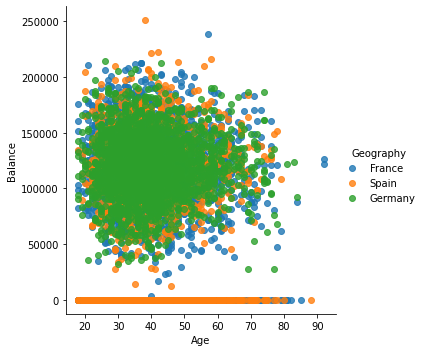

In [ ]:
sns.lmplot(x = 'Age' ,y = 'Balance',hue='Geography',fit_reg= False,data = df)

Multi variate analysis

In [ ]:
import matplotlib.pyplot as plt


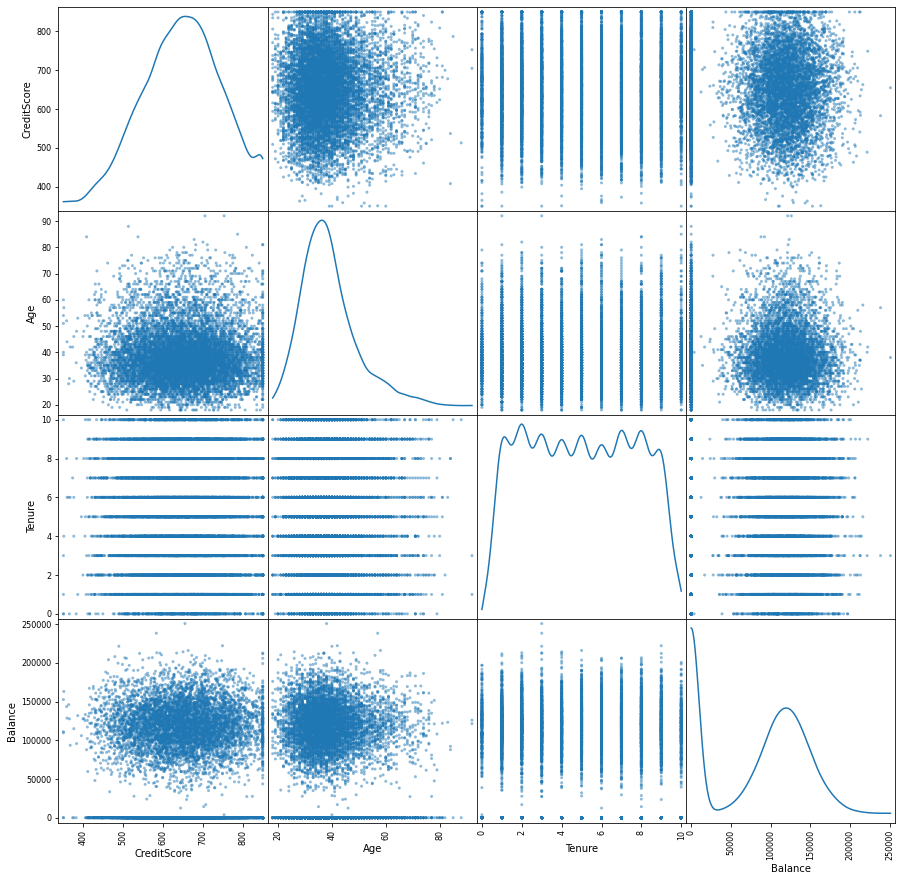

In [ ]:
pd.plotting.scatter_matrix(df.loc[:, "CreditScore":"Balance"], diagonal="kde",figsize=(15,15))
plt.show()

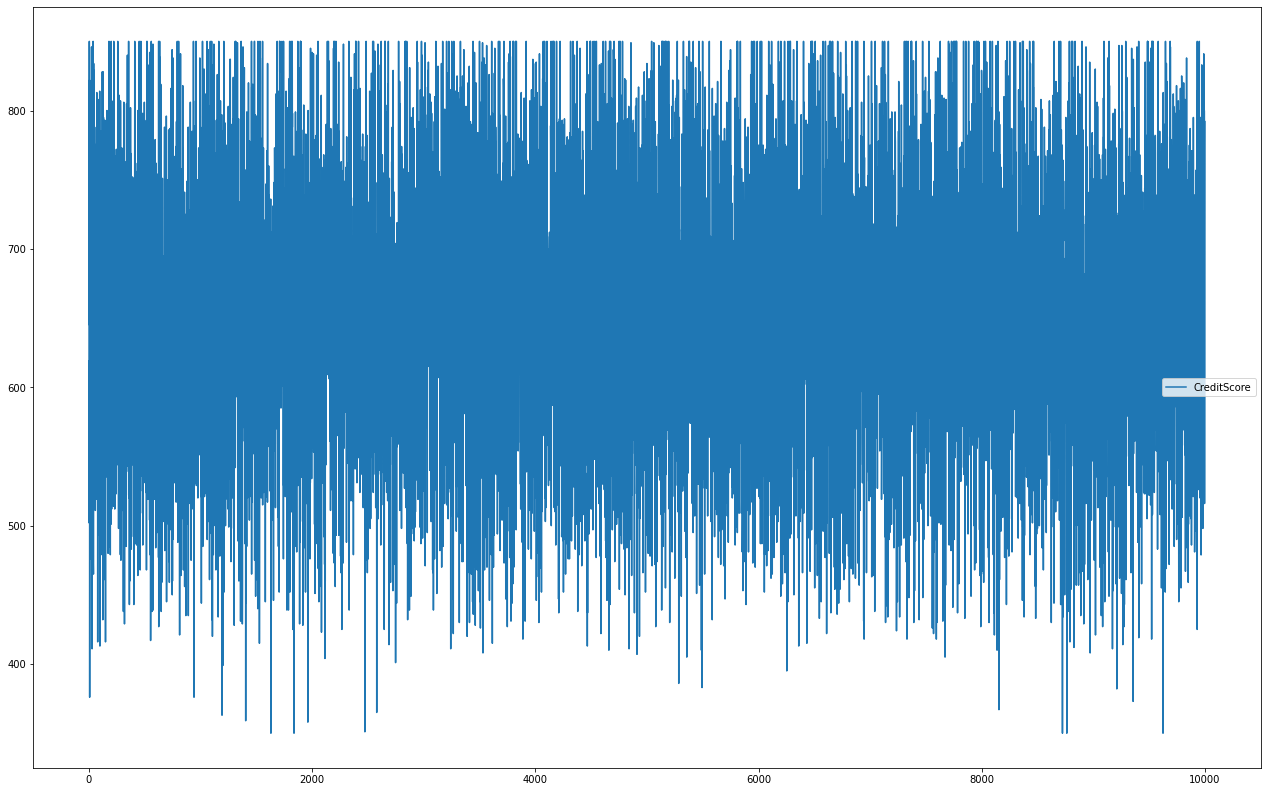

In [ ]:
ax = df[["CreditScore","Geography"]].plot(figsize=(22,14))
ax.legend(loc='center right', bbox_to_anchor=(1, 0.5));

4)Descriptive statistics

In [ ]:
df.CreditScore.mean()

650.5288

In [ ]:
df.CreditScore.std()

96.65329873613035

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


5)Missing data

In [ ]:
df.isnull().count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

6)Outlier and replace outlier

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
bal_mean = df['Age'].mean()
bal_std = df['Age'].std()
low= bal_mean -(3 * bal_std)
high= bal_mean + (3 * bal_std)
bal_outliers = df[(df['Age'] < low) | (df['Age'] > high)]
bal_outliers.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
85,86,15805254,Ndukaku,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
158,159,15589975,Maclean,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
230,231,15808473,Ringrose,673,France,Male,72,1,0.00,2,0,1,111981.19,0
252,253,15793726,Matveyeva,681,France,Female,79,0,0.00,2,0,1,170968.99,0
310,311,15712287,Pokrovskii,652,France,Female,80,4,0.00,2,1,1,188603.07,0


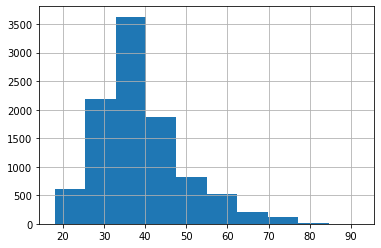

In [ ]:
df['Age'].hist()

In [ ]:
import seaborn as sns

In [ ]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Age']=np.where(df['Age']>upper_whisker,upper_whisker,np.where(df['Age']<lower_whisker,lower_whisker,df['Age']))

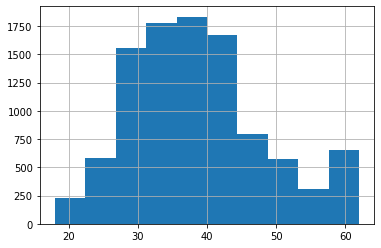

In [ ]:
df['Age'].hist()

7)Categorical columns and perform encoding

In [ ]:
df['Geography']

0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object

In [ ]:
Ge = pd.get_dummies(df['Geography'])
Ge

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


8)Split data into independent and dependent variable

In [ ]:
x = df.drop(['Exited'],axis=1).values
y = df['Exited']

In [ ]:
x


array([[1, 15634602, 'Hargrave', ..., 1, 1, 101348.88],
       [2, 15647311, 'Hill', ..., 0, 1, 112542.58],
       [3, 15619304, 'Onio', ..., 1, 0, 113931.57],
       ...,
       [9998, 15584532, 'Liu', ..., 0, 1, 42085.58],
       [9999, 15682355, 'Sabbatini', ..., 1, 0, 92888.52],
       [10000, 15628319, 'Walker', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

9)Scale the independent variable

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max_scaler = MinMaxScaler()
df[["Balance", "Age"]] = min_max_scaler.fit_transform(df[["Balance", "Age"]])
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  \
0             1    15634602   Hargrave        0.538    France  Female   
1             2    15647311       Hill        0.516     Spain  Female   
2             3    15619304       Onio        0.304    France  Female   
3             4    15701354       Boni        0.698    France  Female   
4             5    15737888   Mitchell        1.000     Spain  Female   
...         ...         ...        ...          ...       ...     ...   
9995       9996    15606229   Obijiaku        0.842    France    Male   
9996       9997    15569892  Johnstone        0.332    France    Male   
9997       9998    15584532        Liu        0.718    France  Female   
9998       9999    15682355  Sabbatini        0.844   Germany    Male   
9999      10000    15628319     Walker        0.884    France  Female   

           Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     0.545455     0.2  0.000000             

10)Split data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(['Exited'],axis=1).values
y = df['Exited']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(10000, 13) (7000, 13) (3000, 13)


In [ ]:
print(y.shape,y_train.shape,y_test.shape)

(10000,) (7000,) (3000,)
